In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [243]:
import matplotlib.image as mpimg


In [244]:
pd.options.display.max_seq_items = 1000

In [245]:
df = pd.read_csv('./AB_NYC_2019.csv')

In [275]:
df_new = pd.DataFrame()
df_new = df_new.append(df[df['price']<50])
df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28,9518,"SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM",31374,Shon,Manhattan,Inwood,40.86482,-73.92106,Private room,44,3,108,2019-06-15,1.11,3,311
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188
58,15338,Room in Greenpoint Loft w/ Roof,32169,Andrea,Brooklyn,Greenpoint,40.72401,-73.93788,Private room,49,4,138,2019-06-04,1.19,3,320
149,34760,Sunny Room in Old Historical Brooklyn Townhouse,149929,Obed,Brooklyn,Fort Greene,40.69101,-73.97312,Private room,44,8,27,2019-06-29,1.05,5,280


In [194]:
# data cleaning
df_clean = df[(df.price > 0) & (df.price < 300) & (df.availability_365>0) & (df.minimum_nights<60)]
df_clean['reviews_per_month'].fillna(0,inplace=True)
df_clean.describe()

<ipython-input-194-94789a37e036>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.805900e+04,2.805900e+04,28059.000000,28059.000000,28059.000000,28059.000000,28059.000000,28059.000000,28059.000000,28059.000000
mean,2.082054e+07,7.979100e+07,40.727477,-73.946058,118.624933,6.675220,33.690189,1.569041,9.220357,171.639902
std,1.146053e+07,8.568759e+07,0.057895,0.052272,64.642042,9.692296,53.068813,1.805892,37.254631,125.893614
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.145253e+07,8.540365e+06,40.687055,-73.980980,65.000000,1.000000,2.000000,0.210000,1.000000,52.000000
50%,2.232332e+07,3.994036e+07,40.721290,-73.951770,100.000000,2.000000,11.000000,1.000000,1.000000,160.000000
75%,3.100865e+07,1.399764e+08,40.763450,-73.927180,159.000000,5.000000,42.000000,2.420000,3.000000,300.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,299.000000,59.000000,629.000000,58.500000,327.000000,365.000000


In [163]:
colors = sns.color_palette('mako_r')

Entire home/apt    13662
Private room       13559
Shared room          838
Name: room_type, dtype: int64


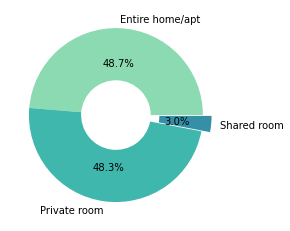

In [164]:
# roomtype distribution
roomtype_counts = df_clean.room_type.value_counts()
print(roomtype_counts)

plt.pie(roomtype_counts, autopct="%.1f%%", labels = roomtype_counts.index, \
        colors = colors, explode = [0,0,0.1], wedgeprops=dict(width=0.6));

Brooklyn         11445
Manhattan        11246
Queens            4169
Bronx              877
Staten Island      322
Name: neighbourhood_group, dtype: int64


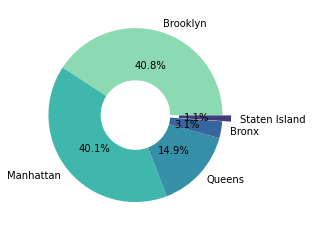

In [165]:
# borough distribution
borough_counts = df_clean.neighbourhood_group.value_counts()
print(borough_counts)

plt.pie(borough_counts, autopct="%.1f%%", labels = borough_counts.index, \
        colors = colors, explode = [0,0,0,0,0.1], wedgeprops=dict(width=0.6));

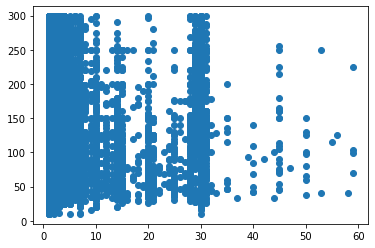

In [111]:
# minumum_nights vs price
plt.scatter(data = df_clean, x = 'minimum_nights', y = 'price')

                       count        mean        std   min   25%    50%  \
neighbourhood_group                                                      
Bronx                  877.0   76.782212  44.230269  10.0  45.0   65.0   
Brooklyn             11445.0  107.265880  58.273581  10.0  60.0   94.0   
Manhattan            11246.0  145.482305  65.912509  10.0  90.0  139.0   
Queens                4169.0   88.611657  52.899495  10.0  50.0   71.0   
Staten Island          322.0   86.909938  54.320050  13.0  50.0   75.0   

                        75%    max  
neighbourhood_group                 
Bronx                 99.00  299.0  
Brooklyn             145.00  299.0  
Manhattan            199.00  299.0  
Queens               108.00  299.0  
Staten Island        102.25  299.0  


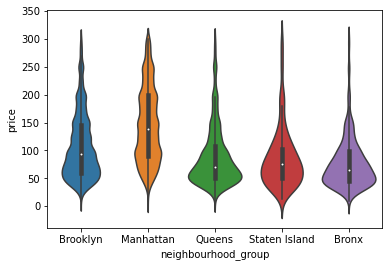

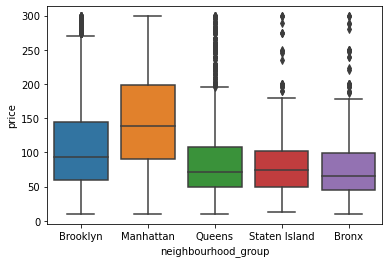

In [112]:
# borough vs price
print(df_clean.groupby('neighbourhood_group')['price'].describe())
sns.violinplot(data = df_clean, x = 'neighbourhood_group', y = 'price')
plt.figure()
sns.boxplot(data = df_clean, x = 'neighbourhood_group', y = 'price');

In [113]:
# neighbourhood vs price
df_clean.groupby(['neighbourhood_group','neighbourhood'])['price'].mean()

neighbourhood_group  neighbourhood
Bronx                Allerton          81.750000
                     Baychester        78.000000
                     Belmont           85.823529
                     Bronxdale         54.923077
                     Castle Hill       63.000000
                                         ...    
Staten Island        Tompkinsville     77.567568
                     Tottenville      144.857143
                     West Brighton     80.555556
                     Westerleigh       71.500000
                     Willowbrook      249.000000
Name: price, Length: 217, dtype: float64

<AxesSubplot:xlabel='room_type', ylabel='price'>

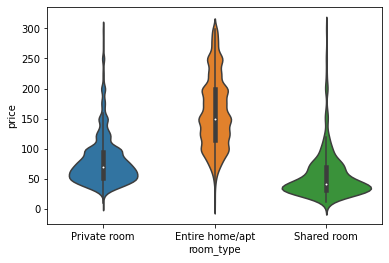

In [114]:
# room_type vs price
df_clean.groupby('room_type')['price'].mean()
sns.violinplot(data = df_clean, x = 'room_type', y = 'price')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

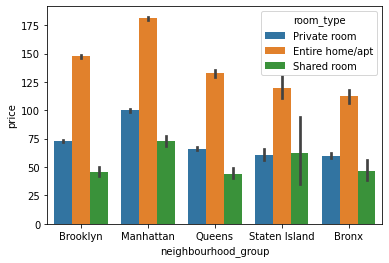

In [115]:
# combining borough and room_type
sns.barplot(data = df_clean, x = 'neighbourhood_group', y = 'price', hue = 'room_type')

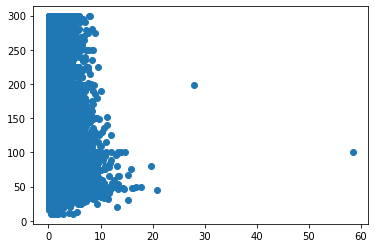

In [116]:
# reviews vs price
plt.scatter(x = df_clean['reviews_per_month'],y = df_clean['price'])

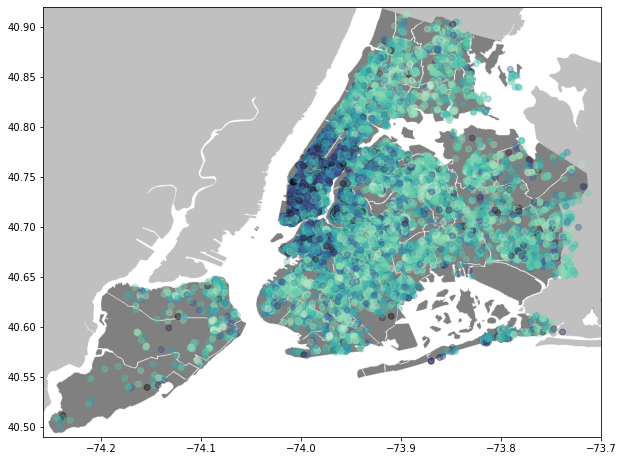

In [189]:
# location-based price illustration 

import wget

image_url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
i = wget.download(image_url)
nyc_img = plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.figure(figsize=(10,8))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

plt.scatter(data = df_clean, x = 'longitude', y = 'latitude', c = 'price', \
            alpha = 0.4, cmap = plt.get_cmap('mako_r'));

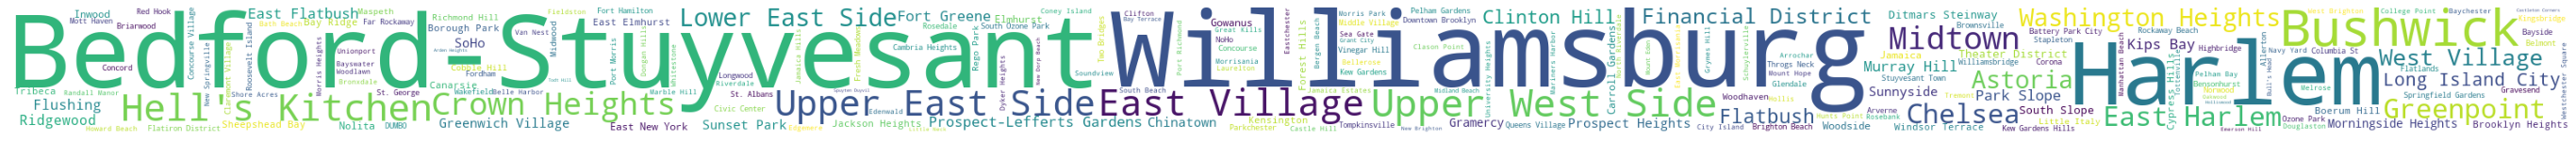

In [263]:
# frequency-based word cloud of neighbourhood

from wordcloud import WordCloud
import multidict as multidict

neighbourhood_dict = dict(df['neighbourhood'].value_counts().apply(lambda x:int(x**1)))
fullTermsDict = multidict.MultiDict()
for key in neighbourhood_dict:
    fullTermsDict.add(key, neighbourhood_dict[key])

plt.figure(figsize=(50,2.5))
neighbourhood_dict = df['neighbourhood'].value_counts
wordcloud = WordCloud(
                          background_color='white',
                          width=3000,
                          height=150
                         ).generate_from_frequencies(fullTermsDict)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('WordCloud.png')

In [219]:
# regression-based price prediction
df_reg = df_clean.drop(['name', 'id', 'host_name', 'last_review'], axis = 1)

In [220]:
encode_dict = {}
for column in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    df_reg[column+'_encoded'], encode_dict[column] = df_reg[column].factorize()

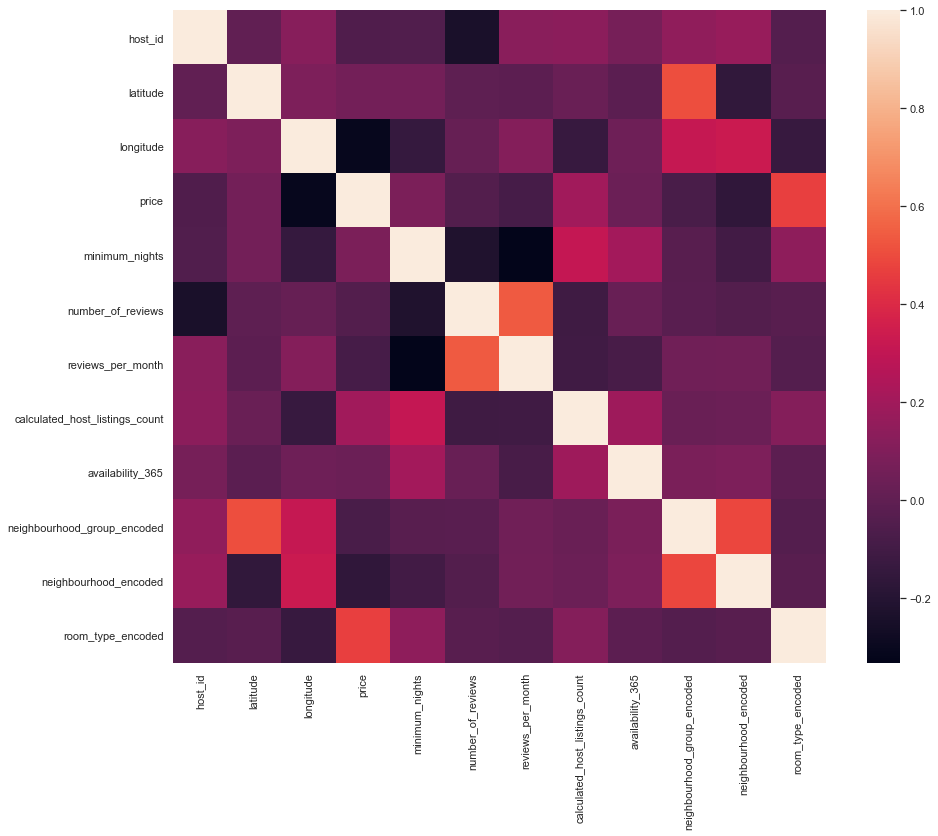

In [224]:
corrmatrix = df_reg.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=1, square=True)
sns.set(font_scale=1.5)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [232]:
X,y = df_reg[['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',\
              'availability_365','neighbourhood_group_encoded','neighbourhood_encoded','room_type_encoded']],\
      df_reg['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [233]:
reg = LinearRegression(fit_intercept = True, normalize = True)
reg.fit(X_train,y_train)

y_pred_reg = reg.predict(X_test)
print('r2 reg: ', r2_score(y_test,y_pred_reg))

r2 reg:  0.2682125642982037


In [234]:
from sklearn.tree import DecisionTreeRegressor

In [235]:
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

y_pred_tree = DTree.predict(X_test)
print('r2 tree: ', r2_score(y_test,y_pred_tree))

r2 tree:  0.3452967156038199
